# Read and explore Data

In [ ]:
import pandas as pd
x = pd.read_csv('emails.csv')
print(x)

       Email No.  the  to  ect  and  ...  military  allowing   ff  dry  Prediction
0        Email 1    0   0    1    0  ...       0.0       0.0  0.0  0.0         0.0
1        Email 2    8  13   24    6  ...       0.0       0.0  1.0  0.0         0.0
2        Email 3    0   0    1    0  ...       0.0       0.0  0.0  0.0         0.0
3        Email 4    0   5   22    0  ...       0.0       0.0  0.0  0.0         0.0
4        Email 5    7   6   17    1  ...       0.0       0.0  1.0  0.0         0.0
...          ...  ...  ..  ...  ...  ...       ...       ...  ...  ...         ...
3640  Email 3641    0   1    2    1  ...       0.0       0.0  0.0  0.0         0.0
3641  Email 3642    4   0    1    1  ...       0.0       0.0  0.0  0.0         0.0
3642  Email 3643    4   4    5    0  ...       0.0       0.0  0.0  0.0         0.0
3643  Email 3644   10  15    9    6  ...       0.0       0.0  1.0  0.0         1.0
3644  Email 3645    3   4    1    1  ...       NaN       NaN  NaN  NaN         NaN

[36

In [ ]:
print(x.info())
print(x.shape)
print(x.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
(5172, 3002)
Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object


Data preprocessing

In [ ]:
import numpy as np
print(x["Prediction"].nunique())
labels = x.iloc[:,-1]
print(labels)
x=x.drop("Prediction",axis = 1)
x=x.drop("Email No.",axis = 1)
labels = labels.tolist()
print(labels)

2
0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [ ]:
x.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Remove every Column with one unique value
for i in x.columns:
  u=x[i].nunique()
  if u==1:
    x=x.drop(i,axis=1)
x.shape

(5172, 3000)

# Fuzzy c mean Clustering algorithm

Initialize Hyper-Parameters and assigning initial Mu

In [ ]:
import numpy as np
# hyper-parameters

points = False                # wether using the points dataset or not

X = np.array(x)
g = 7                         # degree of fuzziness 
dim = X.shape[1]              # number of dimentions
n = X.shape[0]                # number of points
c = len(set(labels))          # number of clusters
                              # convert prediciton list to a set of only unique values and get the length to find no. of clusters

def points_args():
  global X
  global dim
  global n
  global c
  X = np.array([ [0,0], [0,1] ,[0,2] ,[0,3] ,[0,4] ,[5,0] ,[5,1] ,[5,2] ,[5,3] ,[5,4]] )  # dataset matrix
  dim = 2
  n = 10
  c = 2
if (points):
  points_args()


Mu = [ [0.0 for i in range(c)] for j in range(n)]  # col. = no. of clusters , rows = no. of points
Mu = np.array(Mu)


"""
Generating random numbers with sum = 1
"""

sample = []                 # used in generating c random numbers with sum equal 1

## this function should add c numbers that adds up to 1 that represent the mempership vector for one point (i assume)
## we can generate N numbers and divide them by the sum to get the their to total to be equal to 1
## https://stackoverflow.com/questions/18659858/generating-a-list-of-random-numbers-summing-to-1
def fill_sample():
  sample.append(np.random.random())
  sample.append(1.0)        # since value of sum needed is 1.0
  for i in range(c - 2):
    sample.append(np.random.random())
  sample.sort()

fill_sample()

for i in range(n):
  Mu[i][0] = sample[0]
  for j in range(1,c):
    Mu[i][j] = sample[j] - sample[j-1]

  sample = []              # clean the list  
  fill_sample()            # assign new random numbers between 0 and 1 for the next data point membership values (Mu[i])

print(Mu)



[[0.71900131 0.28099869]
 [0.22967509 0.77032491]
 [0.91289775 0.08710225]
 ...
 [0.24510758 0.75489242]
 [0.6491051  0.3508949 ]
 [0.68965909 0.31034091]]


Calculating clusters centorids

In [ ]:
# to calculate centroids of clusters

clusters_centroids = [[0.0 for i in range (dim)] for j in range(c)]   # col. = no. of dimentions, rows = no. of clusters
clusters_centroids = np.array(clusters_centroids)

numbersAfterDecimal = 4
def calc_centroids():
  A = 0.0
  B = 0.0
  for j in range(c):                          # iterate number of clusters
    for k in range(dim):                      # iterate number of dimentions
      for i in range(n):                      # iterate number of points
        A = A + pow(Mu[i][j],g)*X[i][k]
        B = B + pow(Mu[i][j],g)
      clusters_centroids[j][k] = round(A/B , numbersAfterDecimal) 
      A = 0.0
      B = 0.0

  print(clusters_centroids.reshape(c,dim))
calc_centroids()


[[6.5237e+00 6.1670e+00 4.8237e+00 ... 4.2000e-03 8.7370e-01 3.7000e-03]
 [6.5762e+00 6.4391e+00 5.4124e+00 ... 2.4000e-03 1.0220e+00 1.0500e-02]]


Calculating distance between clusters centroids and each point

In [ ]:
from scipy.spatial import distance

dist = [[0.0 for i in range(c)] for j in range(n)]          # col. = no. of clusters , rows = no. of points
dist = np.array(dist)

def calc_distance():
  for i in range(n):                # iterating number of points
    for j in range(c):              # iterating number of clusters
      dist[i][j] = distance.euclidean(clusters_centroids[j], X[i])
  
  print(dist.reshape(n,c))
calc_distance()


[[175.56461053 175.62701958]
 [173.29774514 173.2047055 ]
 [169.15010988 169.19679904]
 ...
 [155.78870457 155.81634512]
 [ 77.25301983  76.6024034 ]
 [238.32066271 238.19019838]]


Updating the Mu

In [ ]:
# revise here ------
new_clusters = []
def calc_mu():
  global new_clusters
  B = 0.0
  DivisionError = False
  for p in range(n):
    for j in range(c):
      for i in range(c):
        # the following if conditions is to prevent division by zero runtime error

        if(dist[p][i] == 0 and dist[p][j] != 0):                # Denominator = 0
          Mu[p][j] = 0
          DivisionError = True
          break

        if(dist[p][j] != 0):                    
          B = B + pow((dist[p][j]/dist[p][i]),2/(g-1))          # the main rule
          
        else:                                                   # If Nomerator = 0 then Mu[p][j] = 1 then should be = 1
          B = 1
          break

      if(DivisionError == False):
        Mu[p][j] = 1/B
      DivisionError = False
      B = 0.0
  new_clusters =  np.argmax(Mu ,axis=1)                         # Labeling the points by the cluster number
  new_clusters = new_clusters.tolist()
  print(Mu)
calc_mu()


[[0.50002962 0.49997038]
 [0.49995525 0.50004475]
 [0.500023   0.499977  ]
 ...
 [0.50001478 0.49998522]
 [0.4992952  0.5007048 ]
 [0.49995437 0.50004563]]


Plotting before re-calculations

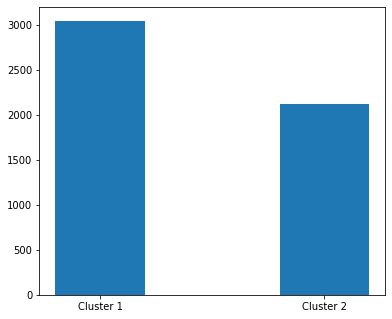

In [ ]:
import matplotlib.pyplot as plt
def plot():
  fig = plt.figure()
  ax  = fig.add_axes([0,0,0.8,1])
  bars = []
  for i in range(c):
    bars.append('Cluster '+ str(i+1))
  values = []
  for i in range(c):
    values.append(new_clusters.count(i))
  ax.bar(bars,values,width = 0.4)
  plt.show()
plot()

Stopping criterion

In [ ]:
old_clusters = [0 for i in range(n)]
def same_clusters():
  global old_clusters
  if (old_clusters == new_clusters):
    return True
  old_clusters = new_clusters
  return False



Repeat till stopping criterion

In [ ]:
for i in range (50):
  print()
  print("Iteration ",i+1)
  print()
  print("Calculating centroids ...")
  calc_centroids()
  print("Calculating Distance ...")
  calc_distance()
  print("Updating Mu ...")
  calc_mu()
  if(same_clusters()):
    print("Stopping criteria is met ... ")
    print("Terminate Re-calculations.")
    break
  



Iteration  1

Calculating centroids ...
[[6.6319e+00 6.1830e+00 5.1396e+00 ... 4.0000e-03 9.1440e-01 6.9000e-03]
 [6.6492e+00 6.1933e+00 5.1480e+00 ... 4.1000e-03 9.1500e-01 7.0000e-03]]
Calculating Distance ...
[[171.75290984 171.84881785]
 [176.53979562 176.46415726]
 [165.36461906 165.46090716]
 ...
 [151.95872939 152.05380692]
 [ 73.50802975  73.57053757]
 [241.85371992 241.75654861]]
Updating Mu ...
[[0.50004652 0.49995348]
 [0.49996429 0.50003571]
 [0.50004851 0.49995149]
 ...
 [0.50005212 0.49994788]
 [0.50007083 0.49992917]
 [0.49996651 0.50003349]]

Iteration  2

Calculating centroids ...
[[6.6368e+00 6.1849e+00 5.1412e+00 ... 4.1000e-03 9.1430e-01 7.0000e-03]
 [6.6443e+00 6.1914e+00 5.1465e+00 ... 4.1000e-03 9.1510e-01 7.0000e-03]]
Calculating Distance ...
[[171.71118359 171.89079833]
 [176.57695934 176.42670022]
 [165.3233195  165.50246328]
 ...
 [151.91681332 152.09598006]
 [ 73.46461304  73.61414505]
 [241.89140367 241.71858959]]
Updating Mu ...
[[0.50008712 0.49991288]
 

Plotting after re-calculations

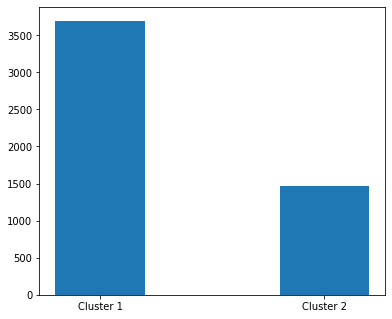

In [ ]:
plot()

Plotting labels (For emails data)

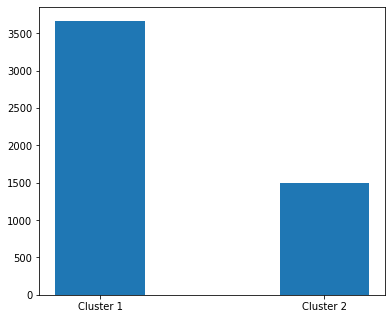

In [ ]:
if(not points): 
  import matplotlib.pyplot as plt
  fig = plt.figure()
  ax  = fig.add_axes([0,0,0.8,1])
  bars = []
  for i in range(c):
    bars.append('Cluster '+ str(i+1))
  values = []
  for i in range(c):
    values.append(labels.count(i))
  ax.bar(bars,values,width = 0.4)
  plt.show()

Plotting for Points dataset (not for the emails data)

In [ ]:
import matplotlib.pyplot as plt
if(points):
  x = X[:,0]
  y = X [:,1]
  plt.scatter(x,y)
  print(new_clusters)
  print(clusters_centroids)
  for i, txt in enumerate(new_clusters):
      plt.annotate(txt, (x[i], y[i]))

  centroids_x = clusters_centroids[:,0]
  centroids_y = clusters_centroids[:,1]
  plt.scatter(centroids_x,centroids_y,marker="x",s=120)
  clusters = [i for i in range(0,c)]
  for i, txt in enumerate(clusters):
      plt.annotate(txt, (centroids_x[i], centroids_y[i]))
  plt.show()

calculate accuracy according to the labels given

In [ ]:
accuracy = 0
first_label = []        # Index of first cluster emails in the labels
sec_label = []          # Index of second cluster emails in the labels
first_pred = []         # Index of first cluster emails in new_clusters list
sec_pred = []           # Index of second cluster emails in new_clusters list

for i in range (n):
  if(new_clusters[i] == 0):
    first_pred.append(i)
  else:
    sec_pred.append(i)
  if(labels[i] == 0):
    first_label.append(i)
  else:
    sec_label.append(i)

if( (len(first_pred)/len(sec_pred)>1 and len(first_label)/len(sec_label)>1)  or  (len(first_pred)/len(sec_pred)<1 and len(first_label)/len(sec_label)<1) ):
  # then they are labeled the same
  for i in range(n):
    if(new_clusters[i] == labels[i]):
      accuracy+=1
else:
  for i in range(n):
    if(new_clusters[i] != labels[i]):
      accuracy+=1
accuracy = accuracy / n
accuracy *=100
print(accuracy)
print(labels) 
print(new_clusters)

60.53750966744006
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 

Printing first five emails from each cluster

In [ ]:
if(not points):
  print("First five emails from cluster 1")
  print()
  print(x.loc[first_pred[:5]])
  print()
  print("First five emails from cluster 2")
  print()
  print(x.loc[sec_pred[:5]])

First five emails from cluster 1

   the  to  ect  and  for  of  ...  lay  infrastructure  military  allowing  ff  dry
0    0   0    1    0    0   0  ...    0               0         0         0   0    0
2    0   0    1    0    0   0  ...    0               0         0         0   0    0
3    0   5   22    0    5   1  ...    0               0         0         0   0    0
4    7   6   17    1    5   2  ...    0               0         0         0   1    0
6    5   3    1    3    2   1  ...    0               0         0         0   0    0

[5 rows x 3000 columns]

First five emails from cluster 2

    the  to  ect  and  for  ...  infrastructure  military  allowing  ff  dry
1     8  13   24    6    6  ...               0         0         0   1    0
5     4   5    1    4    2  ...               0         0         0   0    0
9     4   4   35    0    1  ...               0         0         0   0    0
10   22  14    2    9    2  ...               0         0         0   1    0
11   33  28